<a href="https://colab.research.google.com/github/LahiWeer/2330902-ML_CW/blob/master/ML%20models/Random%20forest%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [3]:
# Step 1: Load the dataset
data_url = 'https://raw.githubusercontent.com/LahiWeer/2330902-ML_CW/refs/heads/master/Preprocessing/resampled_and_original_data.csv'
data = pd.read_csv(data_url)

In [4]:
# Separate features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Perform cross-validation
rf_model = RandomForestClassifier(random_state=42)

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy:", np.std(cv_scores))

Cross-Validation Accuracy Scores: [0.9200259  0.91945276 0.92803368 0.92244799 0.919048  ]
Mean Cross-Validation Accuracy: 0.9218016671917342
Standard Deviation of Cross-Validation Accuracy: 0.0033319365878143933


In [5]:
# Train the model on a train-test split to evaluate performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9207544115266311


In [7]:
# Generate and display the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      6186
           1       0.93      0.91      0.92      6168

    accuracy                           0.92     12354
   macro avg       0.92      0.92      0.92     12354
weighted avg       0.92      0.92      0.92     12354



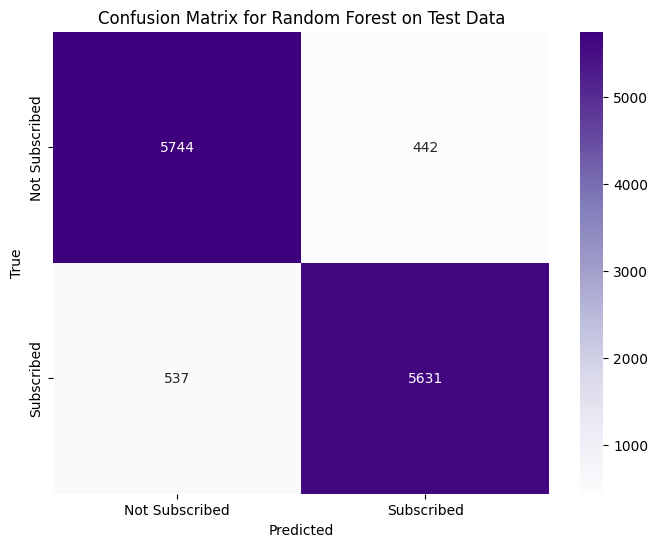

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 13: Generate Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Step 14: Plot Confusion Matrix with Purples Color Map
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix for Random Forest on Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

